In [1]:
import arviz as az
import jax.numpy as jnp
import matplotlib.pylab as plt

from makeCorner import *

az.rcParams["plot.max_subplots"] = 80

In [2]:
cdf_file = "/home/max.lalleman/CBC_Stoch_Search/gwbcbcmodeling/gwbcbcmodeling/New_Code_New_sample/Varying_Power_Law_Sigmoid/cdf_files/CBC_z_0_to_4_analysis_high_low_for_mMax.cdf"
# "./RUNS/CBC_O3_Power_Law.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [3]:
def sigmoid(low, delta, width, middle, zs):
    return delta / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

def sigmoid_no_delta(low, high, width, middle, zs):
    return (high - low) / (1 + jnp.exp(-(1/width)*(zs - middle))) + low

zs = np.linspace(0,2,500)

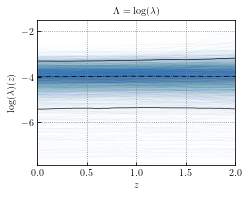

In [10]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
kappa_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
for i in range(samps.alpha_ref.size):
    kappa_r = sigmoid(samps.alpha_ref.values[i],
                               samps.delta_alpha.values[i],
                               10.**samps.log_width_alpha.values[i],
                               samps.middle_z_alpha.values[i],
                               zs,
                              )
    plt.plot(zs, kappa_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    kappa_matrix[i, :] = kappa_r

median_kappa = np.median(kappa_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(-7.9, -1.5)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(\lambda)(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_kappa, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(kappa_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(kappa_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.title(r"$\Lambda = \log(\lambda)$", fontsize = 10)
plt.savefig("Trace_lambda_power_law_z_0_to_2.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

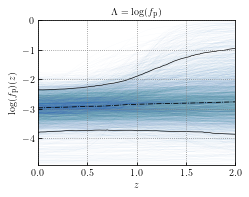

In [11]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
fpeak_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
for i in range(samps.log_f_peak.size):
    f_peak_r = sigmoid_no_delta(samps.log_f_peak.values[i],
                               samps.log_high_f_peak.values[i],
                               10.**samps.log_width_f_peak.values[i],
                               samps.middle_z_f_peak.values[i],
                               zs,
                              )
    plt.plot(zs, f_peak_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 0)
    fpeak_matrix[i, :] = f_peak_r

median_fpeak = np.median(fpeak_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(-4.9, 0)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$\log(f_{\rm p})(z)$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_fpeak, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(fpeak_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(fpeak_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.title(r"$\Lambda = \log(f_{\rm p})$", fontsize = 10)
plt.savefig("Trace_fp_power_law_z_0_to_2.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

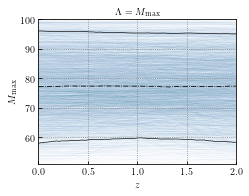

In [9]:
cm = 1/2.54
fig, ax = plt.subplots(figsize=(9*cm, 6.75*cm))
ax.set_rasterization_zorder(2)
mMax_matrix = np.zeros((len(range(samps.alpha_ref.size)), len(zs)))
for i in range(samps.mMax.size):
    mMax_r = sigmoid_no_delta(samps.mMax.values[i],
                               samps.high_mMax.values[i],
                               10.**samps.log_width_mMax.values[i],
                               samps.middle_z_mMax.values[i],
                               zs,
                              )
    plt.plot(zs, mMax_r, lw = 0.05, color='#1f78b4', alpha = 0.2, zorder = 1)
    mMax_matrix[i, :] = mMax_r

median_mMax = np.median(mMax_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(51, 100)
plt.xlabel(r"$z$", fontsize = 10)
plt.ylabel(r"$M_{\rm max}$", fontsize = 10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(zs, median_mMax, "-.", c="k", zorder = 1, lw = 0.8)
plt.plot(zs,np.quantile(mMax_matrix,0.05,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.plot(zs,np.quantile(mMax_matrix,0.95,axis=0), zorder = 1, color='k', lw=0.65, alpha=1)
plt.title(r"$\Lambda = M_{\rm max}$", fontsize = 10)
plt.savefig("Trace_mMax_power_law_z_0_to_2.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

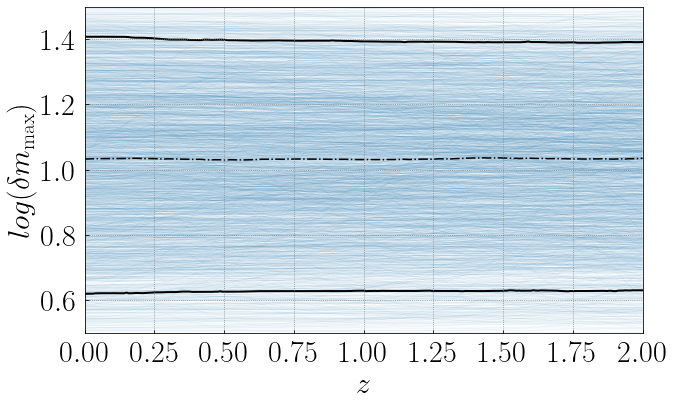

In [18]:
fig,ax = plt.subplots(figsize=(10,6))
ax.set_rasterization_zorder(2)
dmMax_matrix = np.zeros((len(range(samps.log_f_peak.size)), len(zs)))
for i in range(samps.log_dmMax.size):
    f_peak_r = sigmoid_no_delta(samps.log_dmMax.values[i],
                               samps.log_high_dmMax.values[i],
                               10.**samps.log_width_dm.values[i],
                               samps.middle_z_dm.values[i],
                               zs,
                              )
    plt.plot(zs, f_peak_r, lw = 0.15, color='#1f78b4', alpha = 0.2, zorder = 0)
    dmMax_matrix[i, :] = f_peak_r

median_dmMax = np.median(dmMax_matrix, axis = 0)
plt.xlim(0,2)
plt.ylim(0.5, 1.5)
ax.set_xlabel(r"$z$", fontsize = 30)
ax.set_ylabel(r"$log(\delta m_{\rm max})$", fontsize = 30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.plot(zs, median_dmMax, "-.", c="k", zorder = 1)
plt.plot(zs,np.quantile(dmMax_matrix,0.05,axis=0), zorder = 1, color='k', lw=2, alpha=1)
plt.plot(zs,np.quantile(dmMax_matrix,0.95,axis=0), zorder = 1, color='k', lw=2, alpha=1)
plt.savefig("Trace_dmMax_power_law_z_0_to_2.pdf", dpi = 400, bbox_inches = "tight")
plt.show()